In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [41]:
X,y=make_classification(
    n_samples=1000,n_features=50,n_informative=30,n_clusters_per_class=3,random_state=11)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=11)

In [42]:
clf=DecisionTreeClassifier(random_state=11)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.66      0.67      0.66       126
          1       0.66      0.65      0.65       124

avg / total       0.66      0.66      0.66       250



             precision    recall  f1-score   support

          0       0.78      0.73      0.75       126
          1       0.74      0.79      0.77       124

avg / total       0.76      0.76      0.76       250



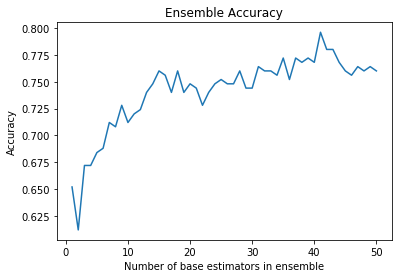

In [43]:
clf=AdaBoostClassifier(random_state=11)
#clf=GradientBoostingClassifier(random_state=11)
#clf=AdaBoostClassifier(base_estimator=LogisticRegression(),random_state=11)
#clf=AdaBoostClassifier(base_estimator=GaussianNB(),random_state=11)
#我们常用的一般是CART决策树或者神经网络MLP。默认是决策树
#完整式AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))
plt.title('Ensemble Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.ylabel('Accuracy')
plt.plot(range(1,51),[accuracy for accuracy in clf.staged_score(X_test,y_test)])
#staged_score(X,y[,sample_weight])：返回一个数组，数组元素依次是每一轮迭代结束时尚未完成的集成分类器的预测准确率
plt.show()